In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv('dc.csv')

df.head()


,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [2]:
#checking the unnamed column's information and renaming it accordingly

df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])




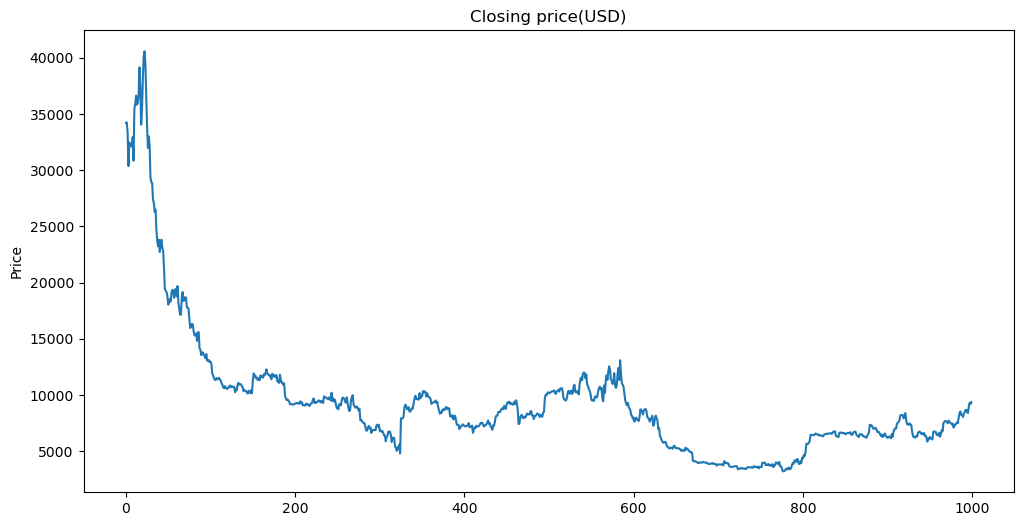

In [3]:
#lets plot the closing price
df['close_USD'].plot(figsize=(12,6), title = 'Closing price(USD)', ylabel = 'Price')
plt.show()

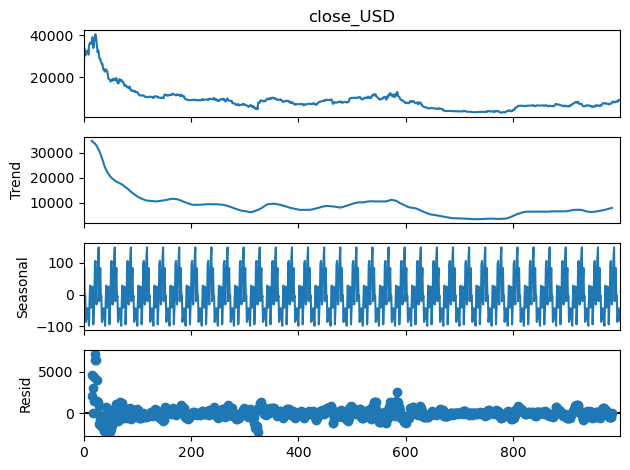

In [4]:
#decomposing the time series
# this will tell us 3 things; trend, seasonality and noise

result = seasonal_decompose(df['close_USD'], model='additive', period=30)
result.plot()
plt.show()

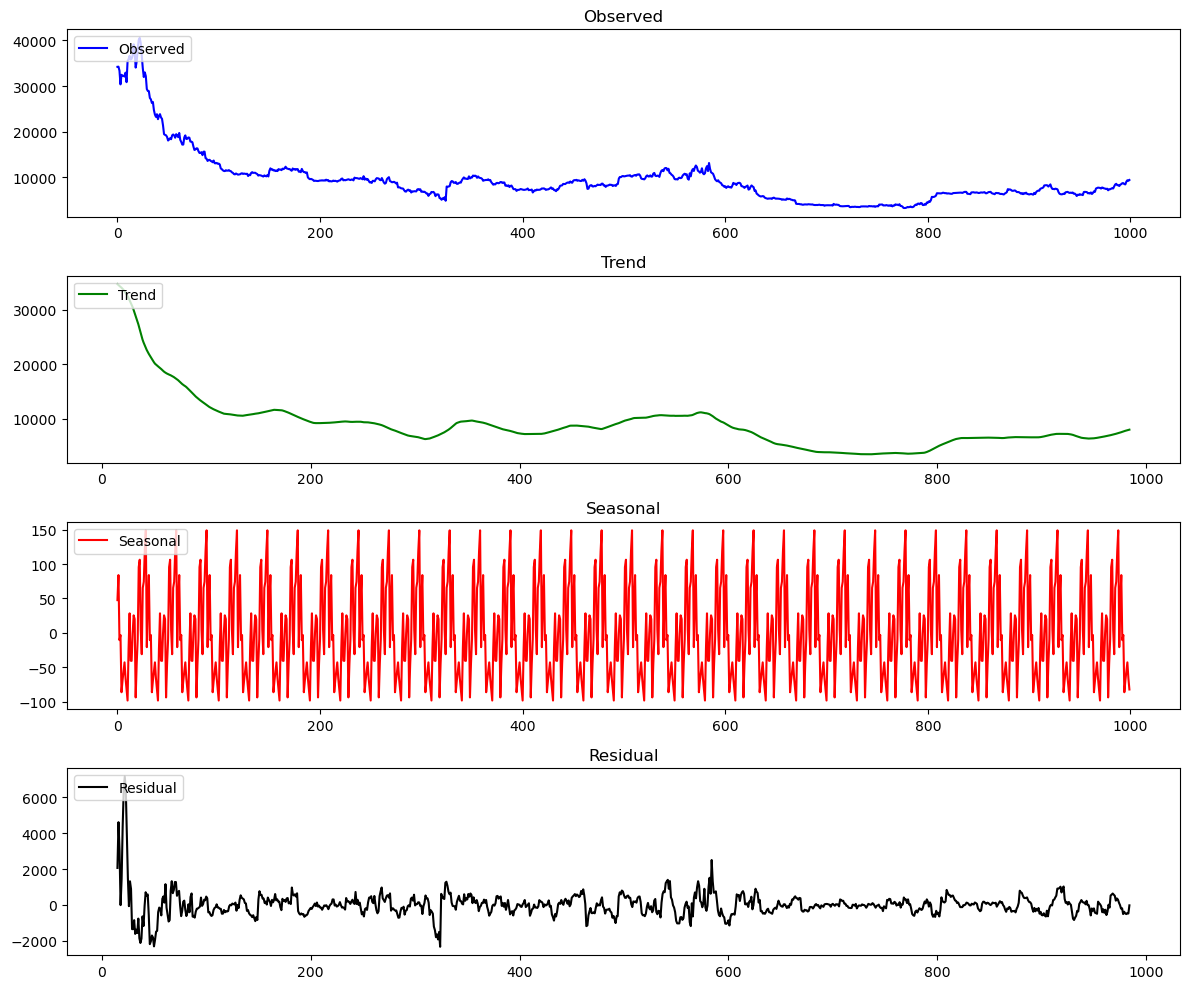

In [5]:


"""
explanation of the components:
Observed: The original time series, showing the raw input values.
Trend: Long term direction in the data,indicating the overall upward and downward movement of the data over time.
Seasonal: Repeating short-term cycle in the data, indicating the periodic fluctuations.
Residual: The random noise in the data, indicating the residual fluctuations that cannot be explained by the trend and seasonal components.

"""
#lets clean this plot to make it look better to understand 
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['close_USD'], model='additive', period=30)

plt.figure(figsize=(12,10))

#observed 
plt.subplot(4,1,1)
plt.plot(result.observed, label = 'Observed', color ='blue')
plt.title('Observed')
plt.legend(loc='upper left')   

#trend
plt.subplot(4,1,2) 
plt.plot(result.trend, label = 'Trend', color ='green')
plt.title('Trend')
plt.legend(loc='upper left')

#seasonal
plt.subplot(4,1,3)
plt.plot(result.seasonal, label = 'Seasonal', color ='red')
plt.title('Seasonal')
plt.legend(loc='upper left')

#residual
plt.subplot(4,1,4)
plt.plot(result.resid, label = 'Residual', color ='black')
plt.title('Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



In [6]:
#lets check the data weekly and monthly periods, first we create new columns for that 

df['Week No.'] = df['Date'].dt.isocalendar().week
df = df[df['Week No.'] != 53] #removing the 53rd week as it is incomplete

df['Month'] = df['Date'].dt.month

#if we dont add a year column, the plot will be wrong as the data is from 2018 to 2021

df['Year'] = df['Date'].dt.year

In [7]:
df

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,Week No.,Month,Year
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072,4,1,2021
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827,4,1,2021
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621,4,1,2021
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911,4,1,2021
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972,4,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227,19,5,2018
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055,19,5,2018
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673,19,5,2018
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533,19,5,2018


In [8]:
weekly_data = df.groupby('Week No.').agg({
    'open_SAR':'mean',
    'open_USD':'mean',
    'high_SAR':'mean',
    'high_USD':'mean',
    'low_SAR':'mean',
    'low_USD':'mean',
    'close_SAR':'mean',
    'close_USD':'mean',
    'volume':'sum'
}).reset_index()

In [9]:
#same for monthly data
monthly_data = df.groupby(['Year','Month']).agg({
    'open_SAR':'mean',
    'open_USD':'mean',
    'high_SAR':'mean',
    'high_USD':'mean',
    'low_SAR':'mean',
    'low_USD':'mean',
    'close_SAR':'mean',
    'close_USD':'mean',
    'volume':'sum'
}).reset_index()

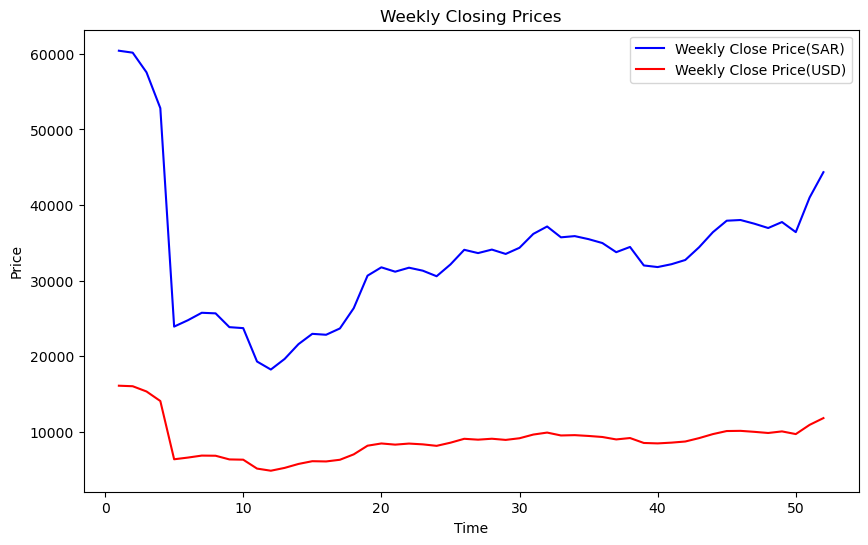

In [10]:
#lets plot them now 
#this data is actually wrong because we didn't consider the year, so we need to add the year to the x-axis
plt.figure(figsize=(10,6))
plt.plot(weekly_data['Week No.'], weekly_data['close_SAR'], label = 'Weekly Close Price(SAR)', color = 'blue')
plt.plot(weekly_data['Week No.'], weekly_data['close_USD'], label = 'Weekly Close Price(USD)', color = 'red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Weekly Closing Prices')
plt.legend()
plt.show()

In [11]:
df.isnull().sum()   

Date         0
open_SAR     0
open_USD     0
high_SAR     0
high_USD     0
low_SAR      0
low_USD      0
close_SAR    0
close_USD    0
volume       0
Week No.     0
Month        0
Year         0
dtype: int64

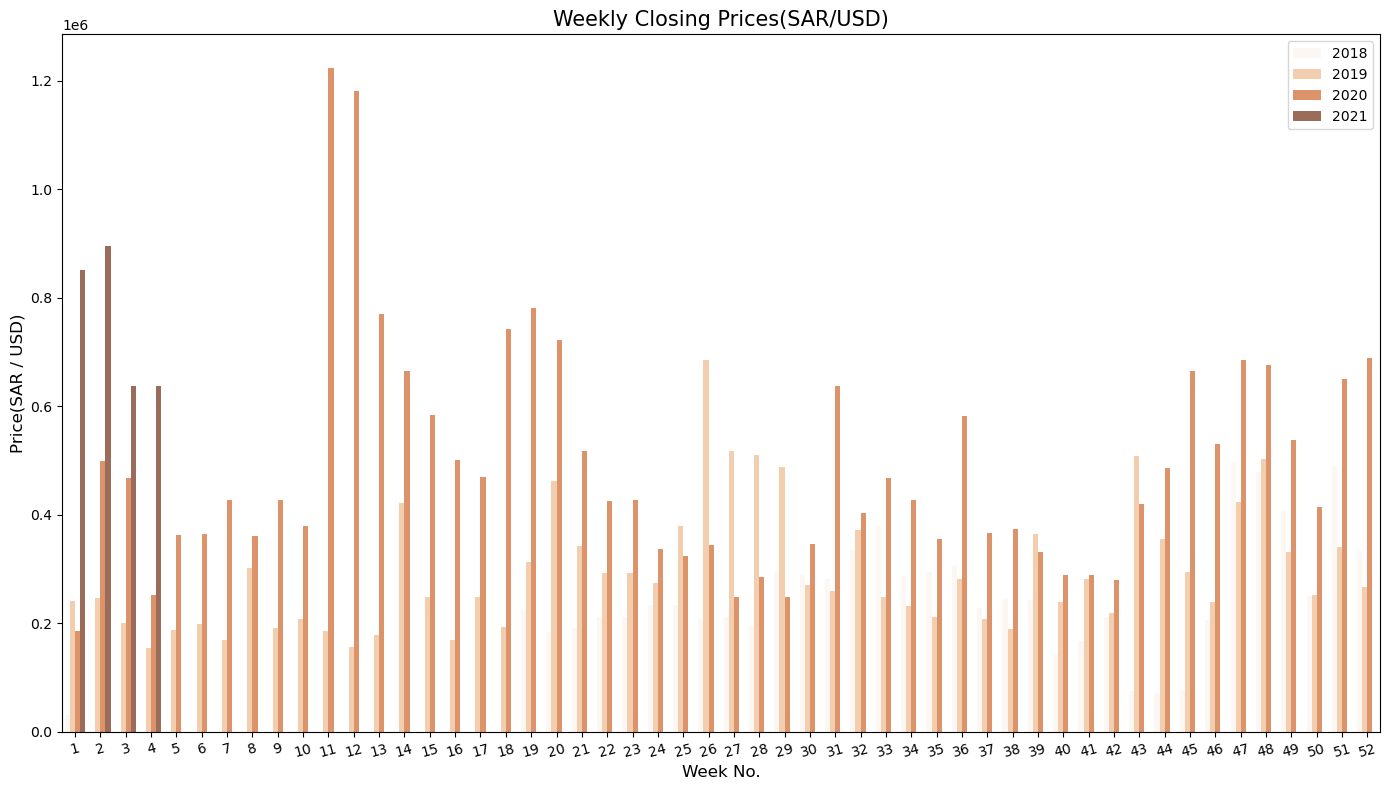

In [12]:
#lets use a barplot to show the volume of transactions in each week
import seaborn as sns   

weekly_data = df.groupby(['Year','Week No.']).agg({
    'close_SAR':'mean',
    'close_USD':'mean',
    'volume':'sum'
}).reset_index()

plt.figure(figsize=(14,8))

sns.barplot(x= 'Week No.', y= "volume", data = weekly_data, hue= 'Year', palette = 'Oranges',alpha=0.7) 


plt.xlabel('Week No.',fontsize=12)
plt.ylabel('Price(SAR / USD)',fontsize=12)
plt.title('Weekly Closing Prices(SAR/USD)',fontsize=15)
plt.xticks(rotation=15)
plt.legend()

plt.tight_layout()
plt.show()

    
    


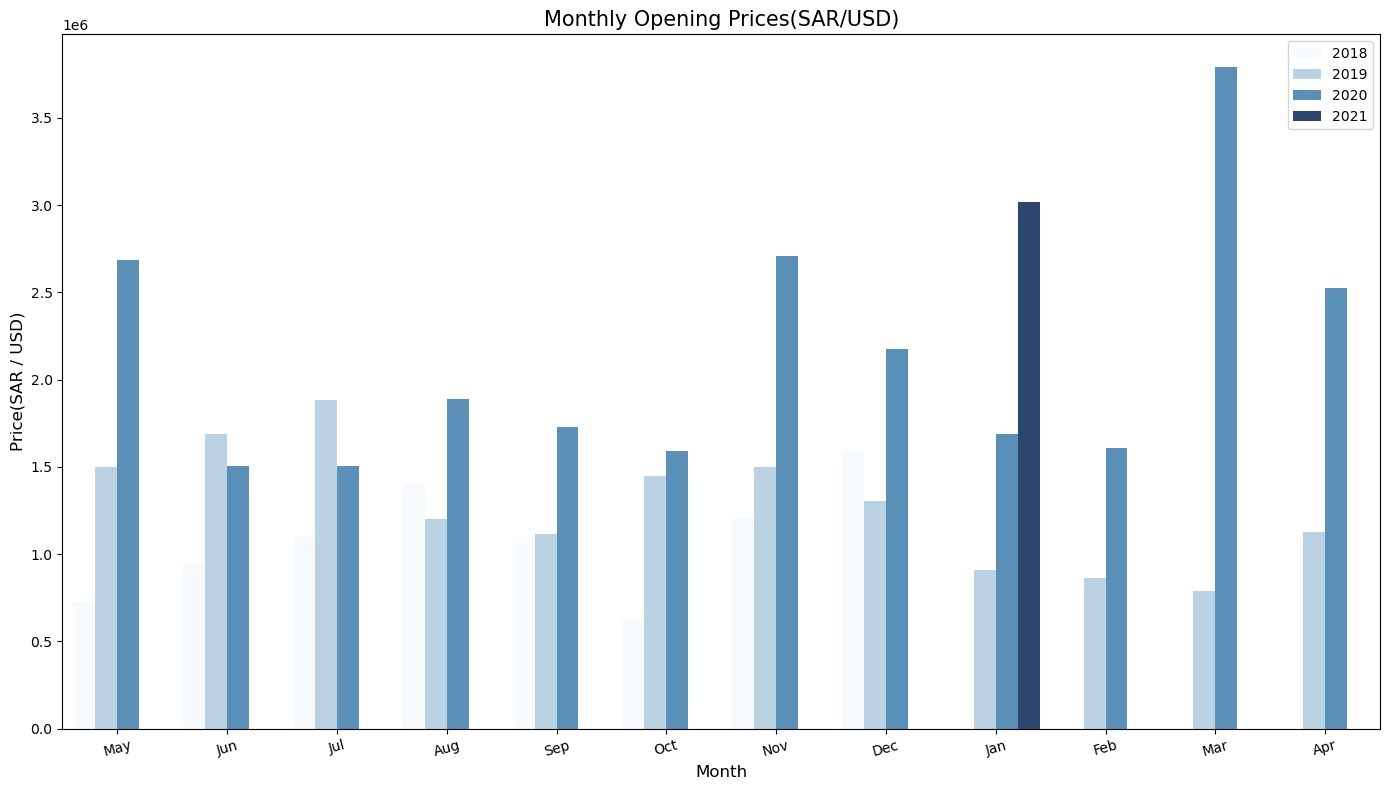

In [13]:
monthly_data = df.groupby(['Year','Month']).agg({
    'open_SAR':'mean',
    'open_USD':'mean',
    'volume':'sum'
}).reset_index()



#lets changed the month names from numbers to names

monthly_data['Month Name']= monthly_data['Month'].apply(lambda x: pd.to_datetime(f"2020-{x:02d}-01").strftime('%b'))

plt.figure(figsize=(14,8))

sns.barplot(x= 'Month Name', y= "volume", data = monthly_data, hue= 'Year', palette = 'Blues',alpha=0.9) 


plt.xlabel('Month',fontsize=12)
plt.ylabel('Price(SAR / USD)',fontsize=12)
plt.title('Monthly Opening Prices(SAR/USD)',fontsize=15)
plt.xticks(rotation=15)
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/7t/gk_qv83x7jzdycfbpkl_k40r0000gn/T/ipykernel_85145/32064056.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'Month Name', y= "high_USD", data = monthly_data, hue= 'Year', palette = 'Set2',ci=None, dodge = True)


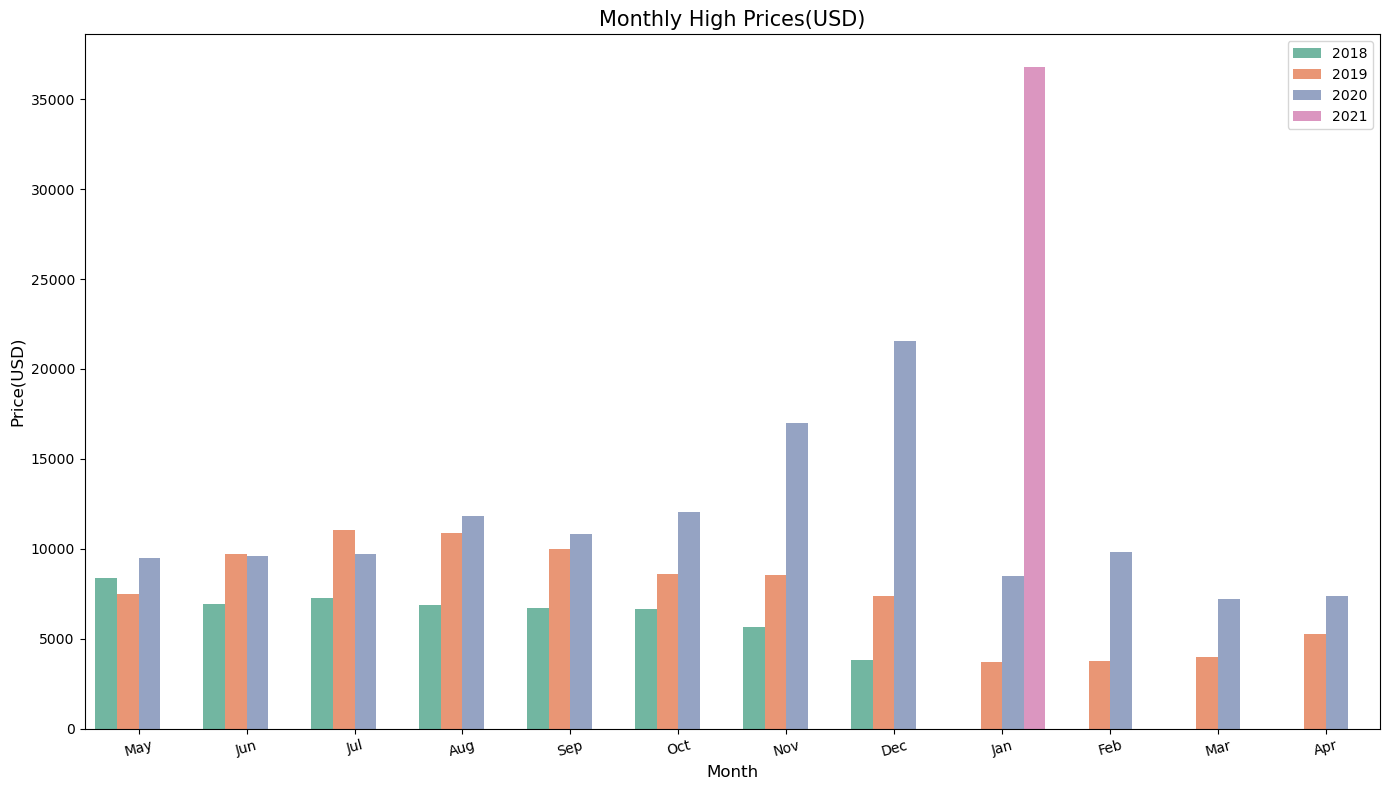

In [14]:
#lets check the high_usd prices and make a better readable plot
monthly_data = df.groupby(['Year','Month']).agg({
    'high_USD':'mean',
    'volume':'sum'
}).reset_index()

monthly_data['Month Name']= monthly_data['Month'].apply(lambda x: pd.to_datetime(f"2020-{x:02d}-01").strftime('%b'))

plt.figure(figsize=(14,8))

sns.barplot(x= 'Month Name', y= "high_USD", data = monthly_data, hue= 'Year', palette = 'Set2',ci=None, dodge = True)

plt.xlabel('Month',fontsize=12)
plt.ylabel('Price(USD)',fontsize=12)
plt.title('Monthly High Prices(USD)',fontsize=15)
plt.xticks(rotation=15)
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
#lets make it more interactive

import plotly.express as px

monthly_data = df.groupby(['Year','Month']).agg({
    'high_USD':'mean'
}).reset_index() 
#changing month numbers to names
monthly_data['Month Name']= monthly_data['Month'].apply(lambda x: pd.to_datetime(f"2020-{x:02d}-01").strftime('%b'))

fig = px.bar(monthly_data, x='Month Name', y='high_USD', color='Year', barmode='group', labels={'high USD': 'High USD Price','Month Name':'Month'},title='Monthly High Prices(USD)')

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', hoverinfo='x + y')

fig.show()

/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/stats

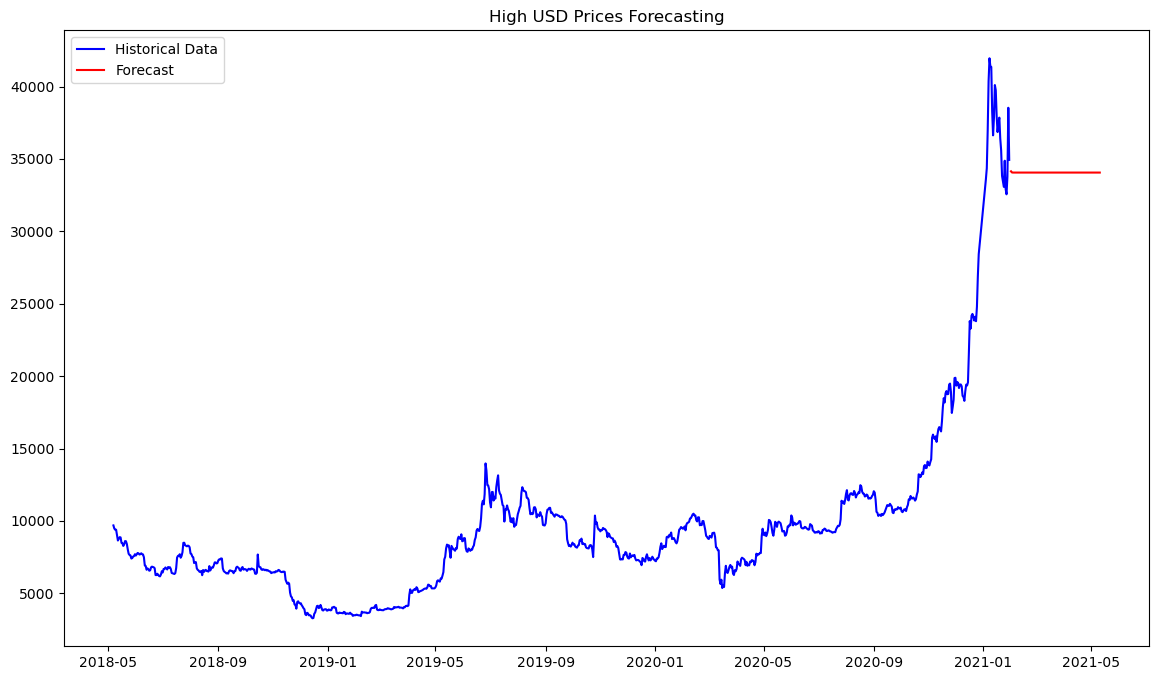

In [16]:
#forecasting the high_usd prices using ARIMA model
from statsmodels.tsa.arima.model import ARIMA

df= df.sort_values(by = 'Date')

df.set_index('Date', inplace=True)

model = ARIMA(df['high_USD'], order=(1,1,1))
model_fit = model.fit()
#forecasting next 30 days
forecast = model_fit.forecast(steps= 100)

plt.figure(figsize=(14,8))
plt.plot(df.index, df['high_USD'], label = 'Historical Data', color = 'blue')
plt.plot(pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=101, freq='D')[1:], forecast, label = 'Forecast', color = 'red')
plt.legend()
plt.title('High USD Prices Forecasting')
plt.show()



In [17]:
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,Week No.,Month,Year
Date,,,,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787,19,5,2018
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533,19,5,2018
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673,19,5,2018
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055,19,5,2018
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227,19,5,2018


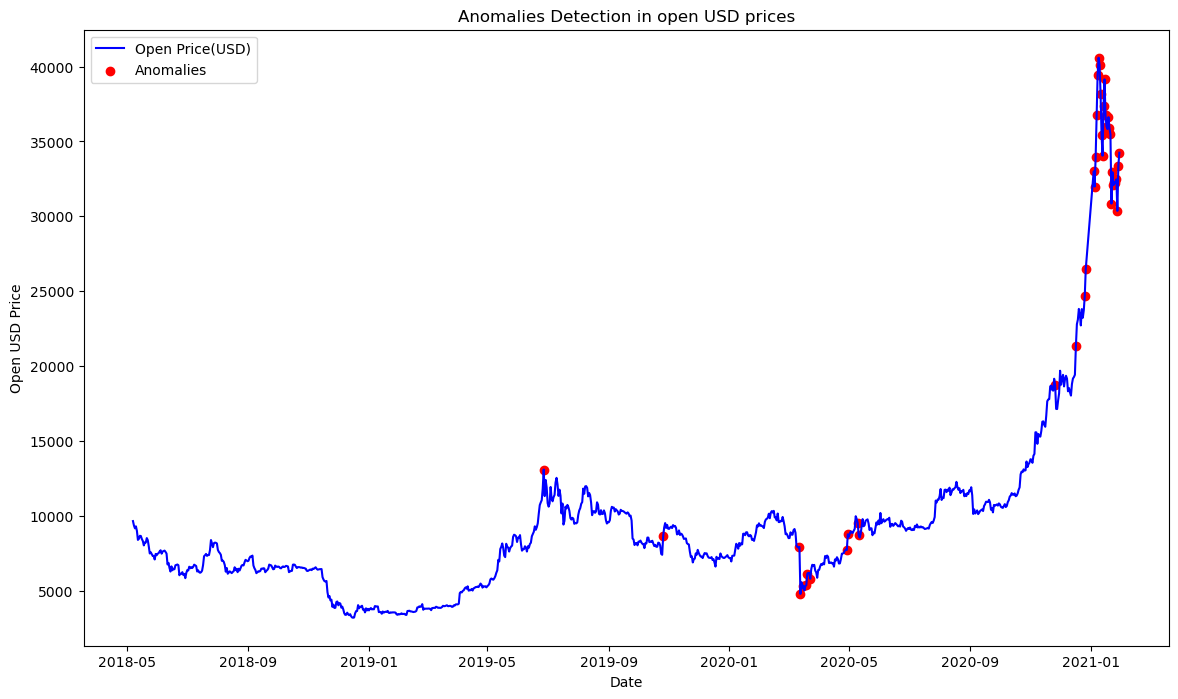

In [27]:
#anomaly detection using z-score method
from scipy.stats import zscore
import numpy as np

df = df.sort_values(by='Date')

columns_to_check = ['open_USD', 'high_USD', 'low_USD','close_USD', 'volume']

z_scores = df[columns_to_check].apply(zscore)

outliers = (np.abs(z_scores) > 3)

anomalies = df[outliers.any(axis=1)]

plt.figure(figsize=(14,8))
plt.plot(df.index, df['open_USD'], label = 'Open Price(USD)', color = 'blue') 
plt.scatter(anomalies.index, anomalies['open_USD'], color = 'red', label = 'Anomalies')
plt.title('Anomalies Detection in open USD prices')
plt.xlabel('Date')
plt.ylabel('Open USD Price')
plt.legend()
plt.show()


/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



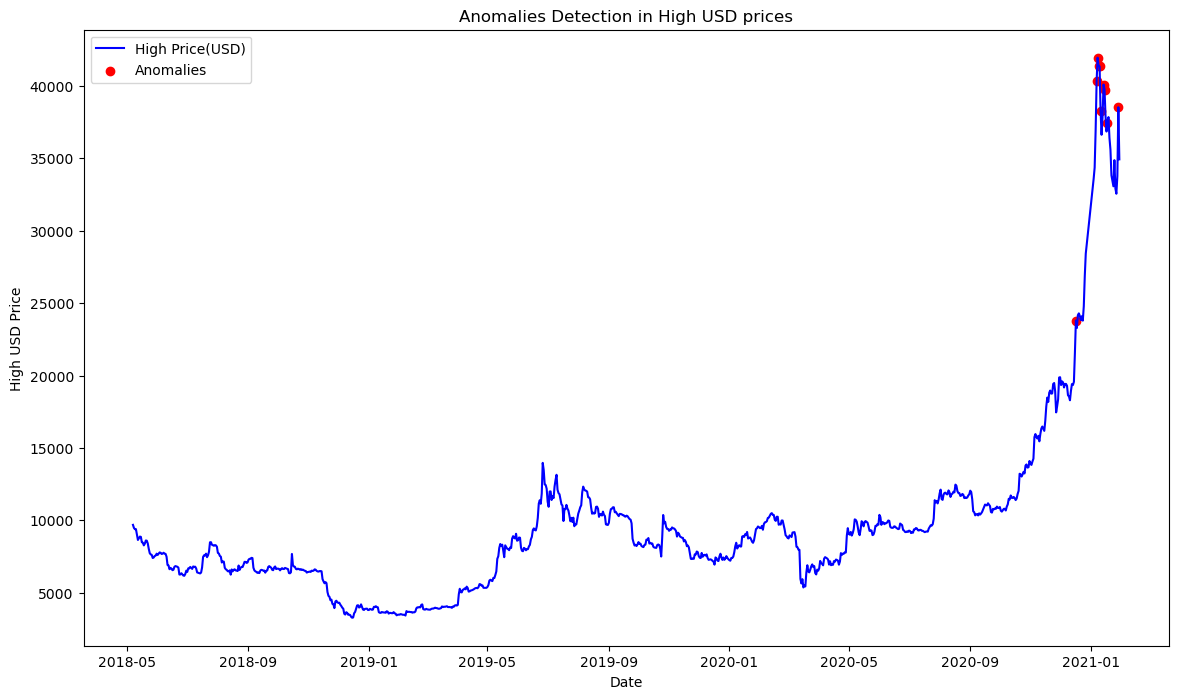

Anomalies detected using Isolation Forest: 10
                 open_SAR  open_USD       high_SAR  high_USD        low_SAR  \
Date                                                                          
2020-12-17   80016.734208  21335.52   89259.520000  23800.00   79620.992000   
2021-01-07  137899.807744  36769.36  151384.896000  40365.00  136139.520000   
2021-01-08  147887.572992  39432.48  157329.280000  41950.00  136889.600000   
2021-01-09  152217.334784  40586.96  155191.552000  41380.00  145215.488000   
2021-01-10  150346.860288  40088.22  155079.040000  41350.00  131680.706944   
2021-01-11  143077.835008  38150.02  143508.080896  38264.74  114087.168000   
2021-01-14  140157.623552  37371.38  150391.040000  40100.00  137644.292992   
2021-01-15  146810.195584  39145.21  149069.999104  39747.76  129043.763200   
2021-01-18  134358.042496  35824.99  140526.850432  37469.83  130513.920000   
2021-01-29  125144.022272  33368.18  144510.037760  38531.90  119695.516160   

     

In [28]:
#lets use isolation forest for anomaly detection this time on high usd
from sklearn.ensemble import IsolationForest

features = ['open_USD', 'high_USD', 'low_USD','close_USD', 'volume']

iso_forest = IsolationForest(contamination=0.01) # contamination rate , 1% is my assumption here 
df['anomaly'] = iso_forest.fit_predict(df[features])

anomalies_iso = df[df['anomaly'] == -1] # anomalies will be marked as -1 in the result 

plt.figure(figsize=(14,8))
plt.plot(df.index, df['high_USD'], label = 'High Price(USD)', color = 'blue')
plt.scatter(anomalies_iso.index, anomalies_iso['high_USD'], color = 'red', label = 'Anomalies')
plt.title('Anomalies Detection in High USD prices')
plt.xlabel('Date')
plt.ylabel('High USD Price')
plt.legend()
plt.show()

print('Anomalies detected using Isolation Forest:', anomalies_iso.shape[0])
print(anomalies_iso)